# Lab4 - Uczenie Maszynowe

## Import bibliotek i wczytanie danych

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('dataset/glass.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
df.drop(['Id'], axis=1, inplace=True)
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Zad 1 - eksploracja danych

In [5]:
df.shape

(214, 10)

In [6]:
df.isnull().sum()

RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64

In [7]:
df.dtypes

RI           float64
Na           float64
Mg           float64
Al           float64
Si           float64
K            float64
Ca           float64
Ba           float64
Fe           float64
GlassType      int64
dtype: object

In [8]:
df['GlassType'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: GlassType, dtype: int64

In [9]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,GlassType
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


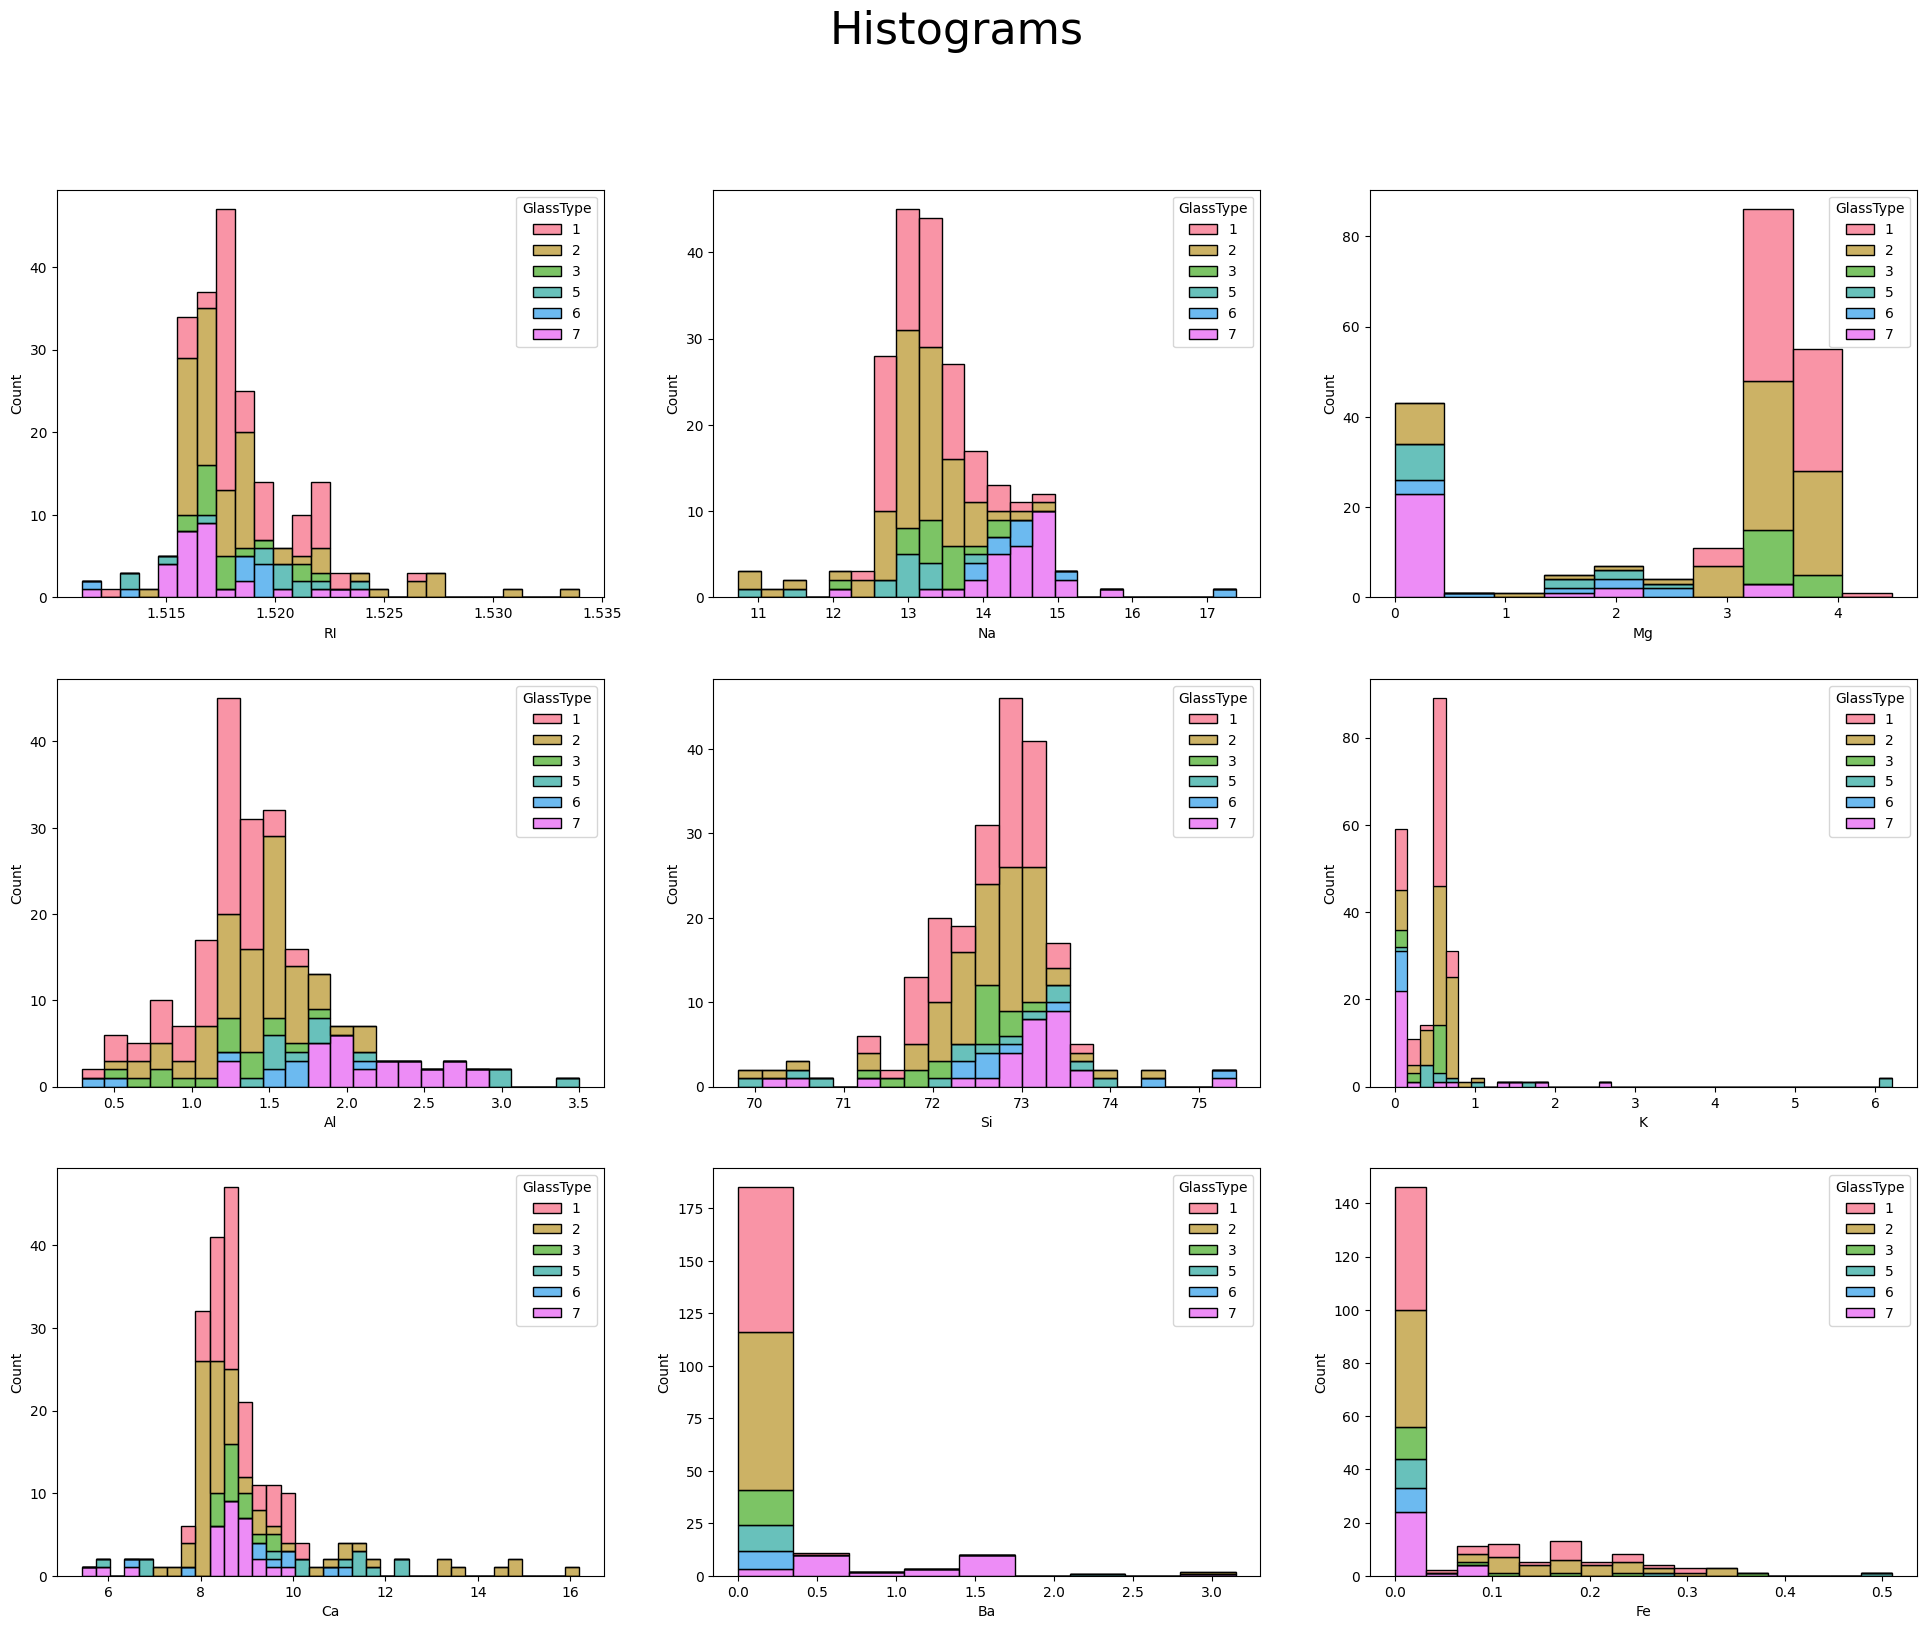

In [10]:
palette = sns.color_palette("husl", 6)
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(24, 18))
fig.suptitle("Histograms", fontsize=32)

for i, col in enumerate(df.iloc[:, :9].columns):
    sns.histplot(data=df, x=col, hue="GlassType", ax=axs[i // 3][i % 3], palette=palette, multiple="stack")

plt.show()

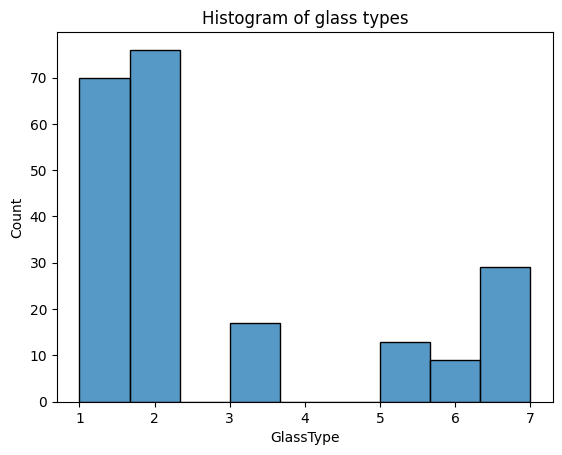

In [11]:
sns.histplot(data=df, x="GlassType").set(title='Histogram of glass types')
plt.show()

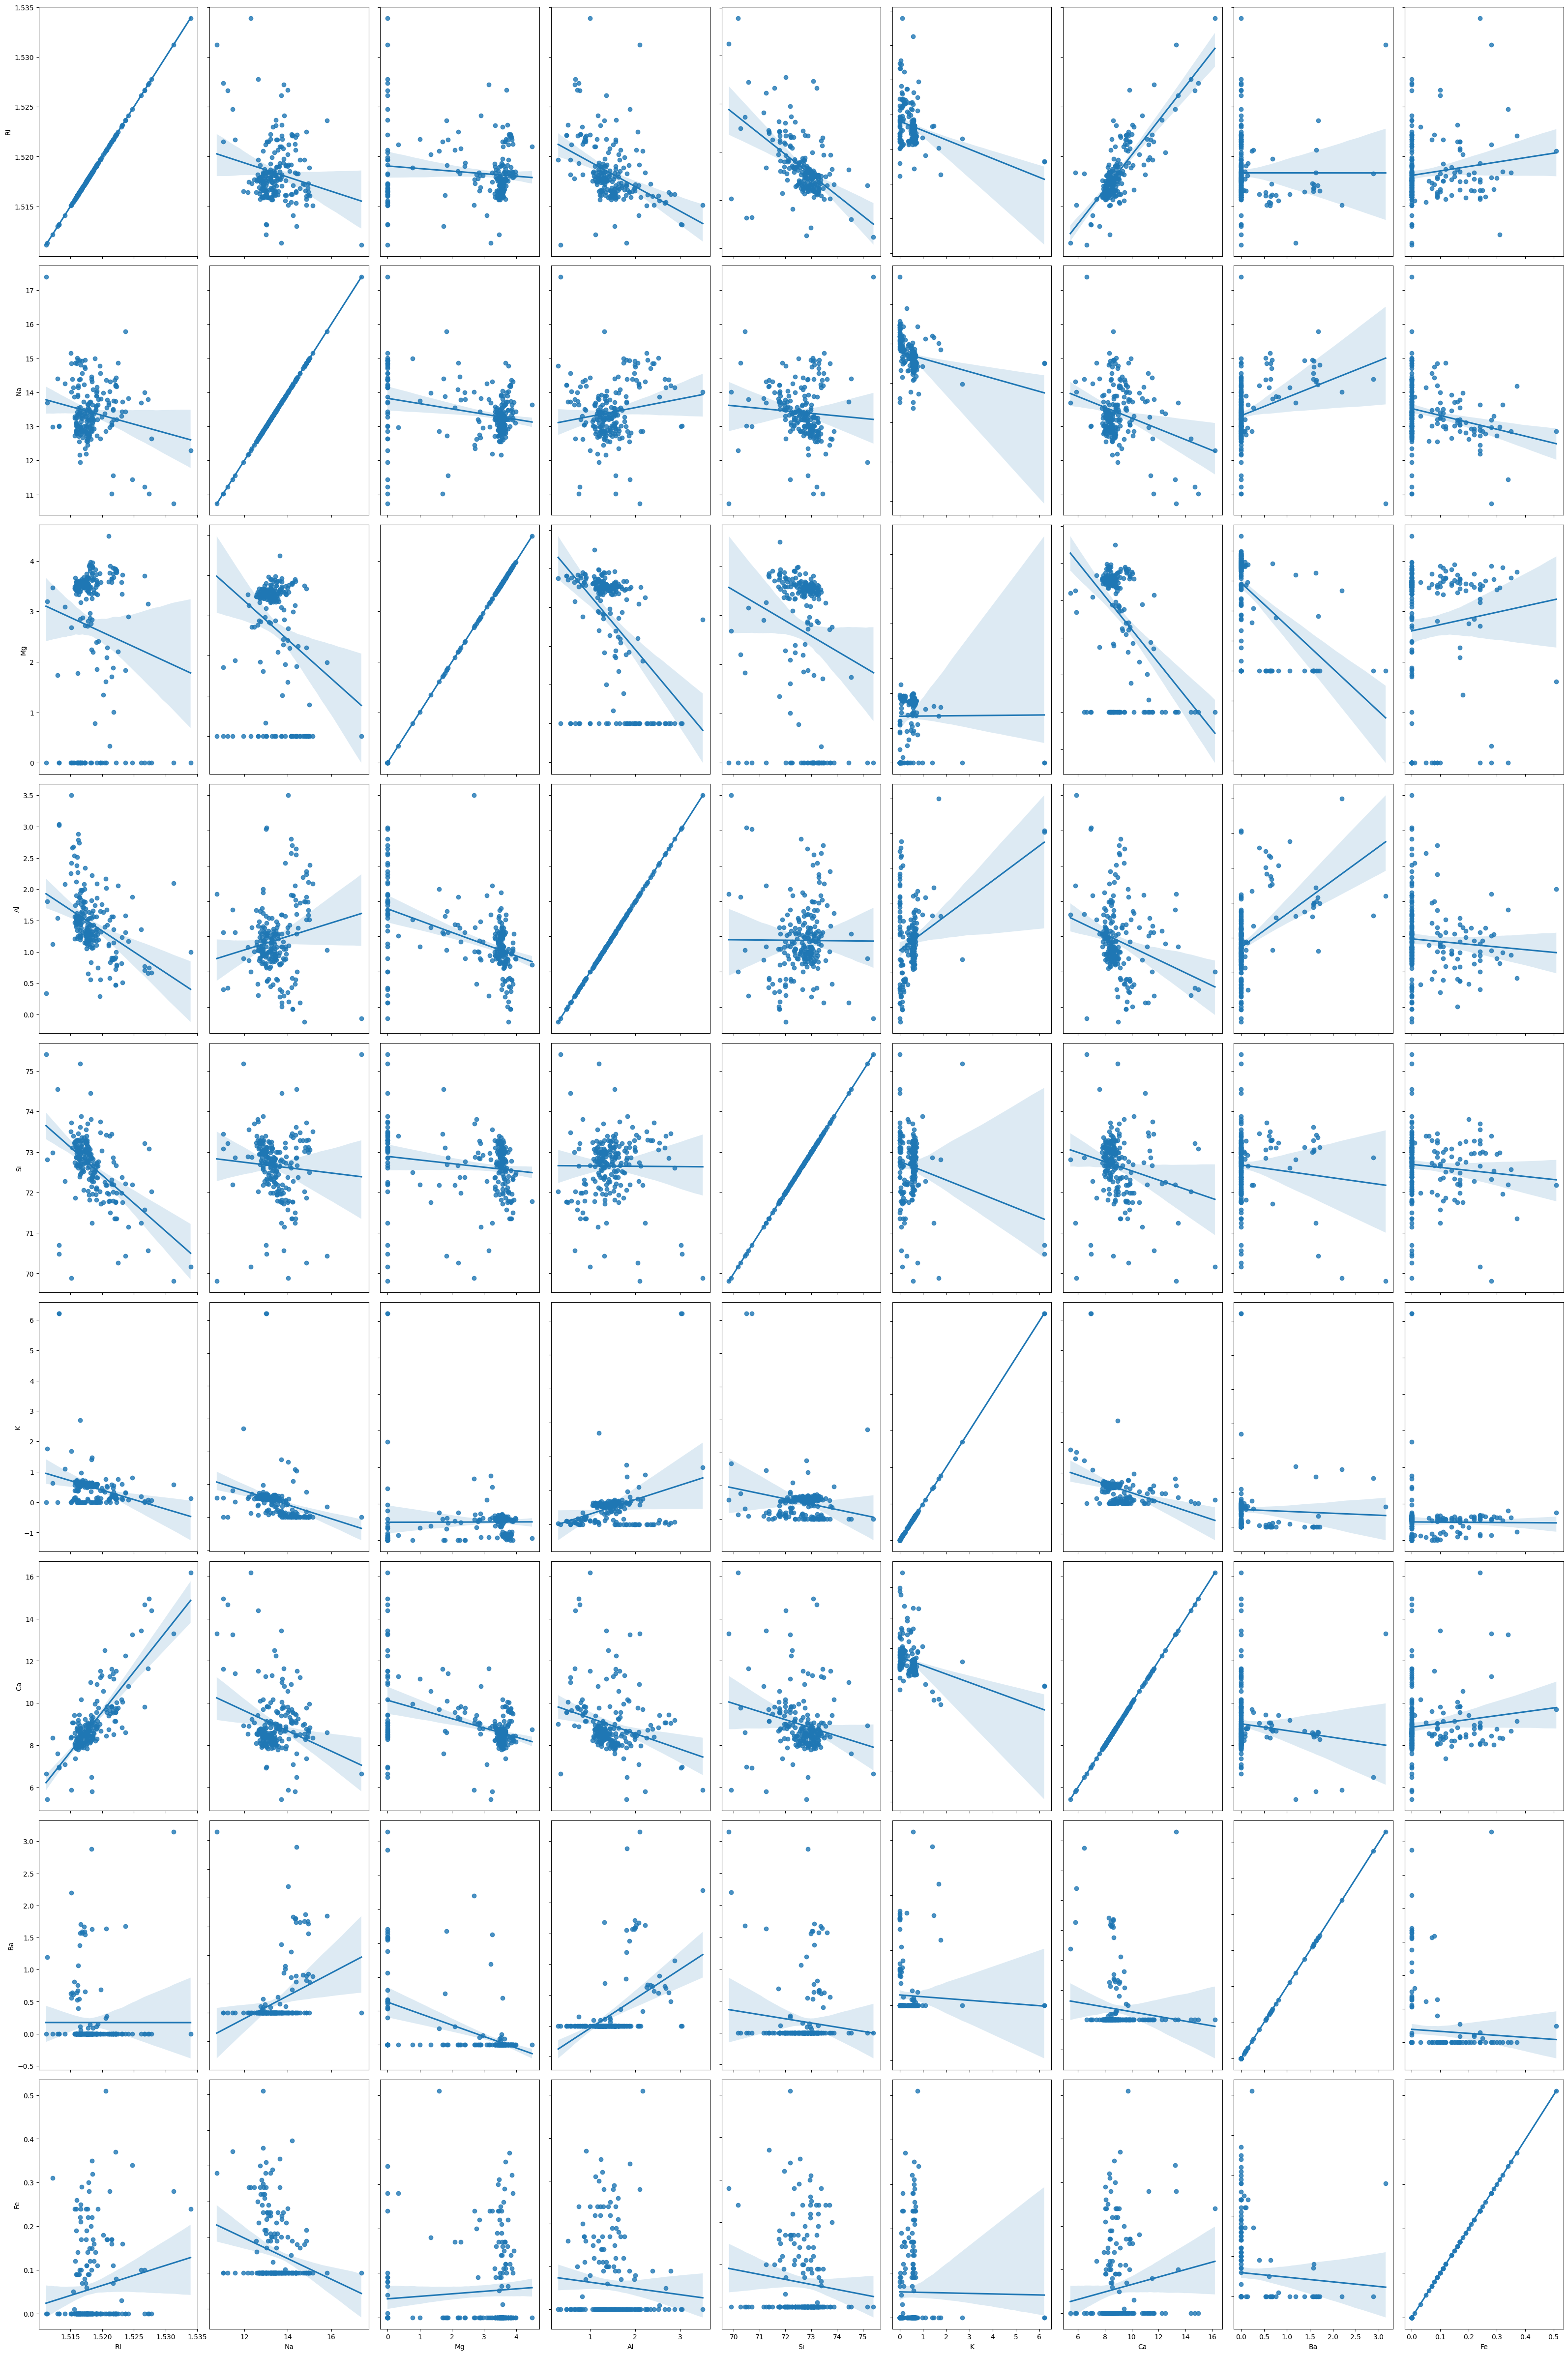

In [12]:
fig, axs = plt.subplots(nrows=9, ncols=9, figsize=(32, 48))
for i, col in enumerate(df.iloc[:, :9].columns):
    for j, col2 in enumerate(df.iloc[:, :9].columns):
        g = sns.regplot(data=df, x=col, y=col2, ax=axs[j][i])
        if i > 0:
            g.set(ylabel=None, yticklabels=[])
        if j != 8:
            g.set(xlabel=None, xticklabels=[])

plt.tight_layout()
plt.show()

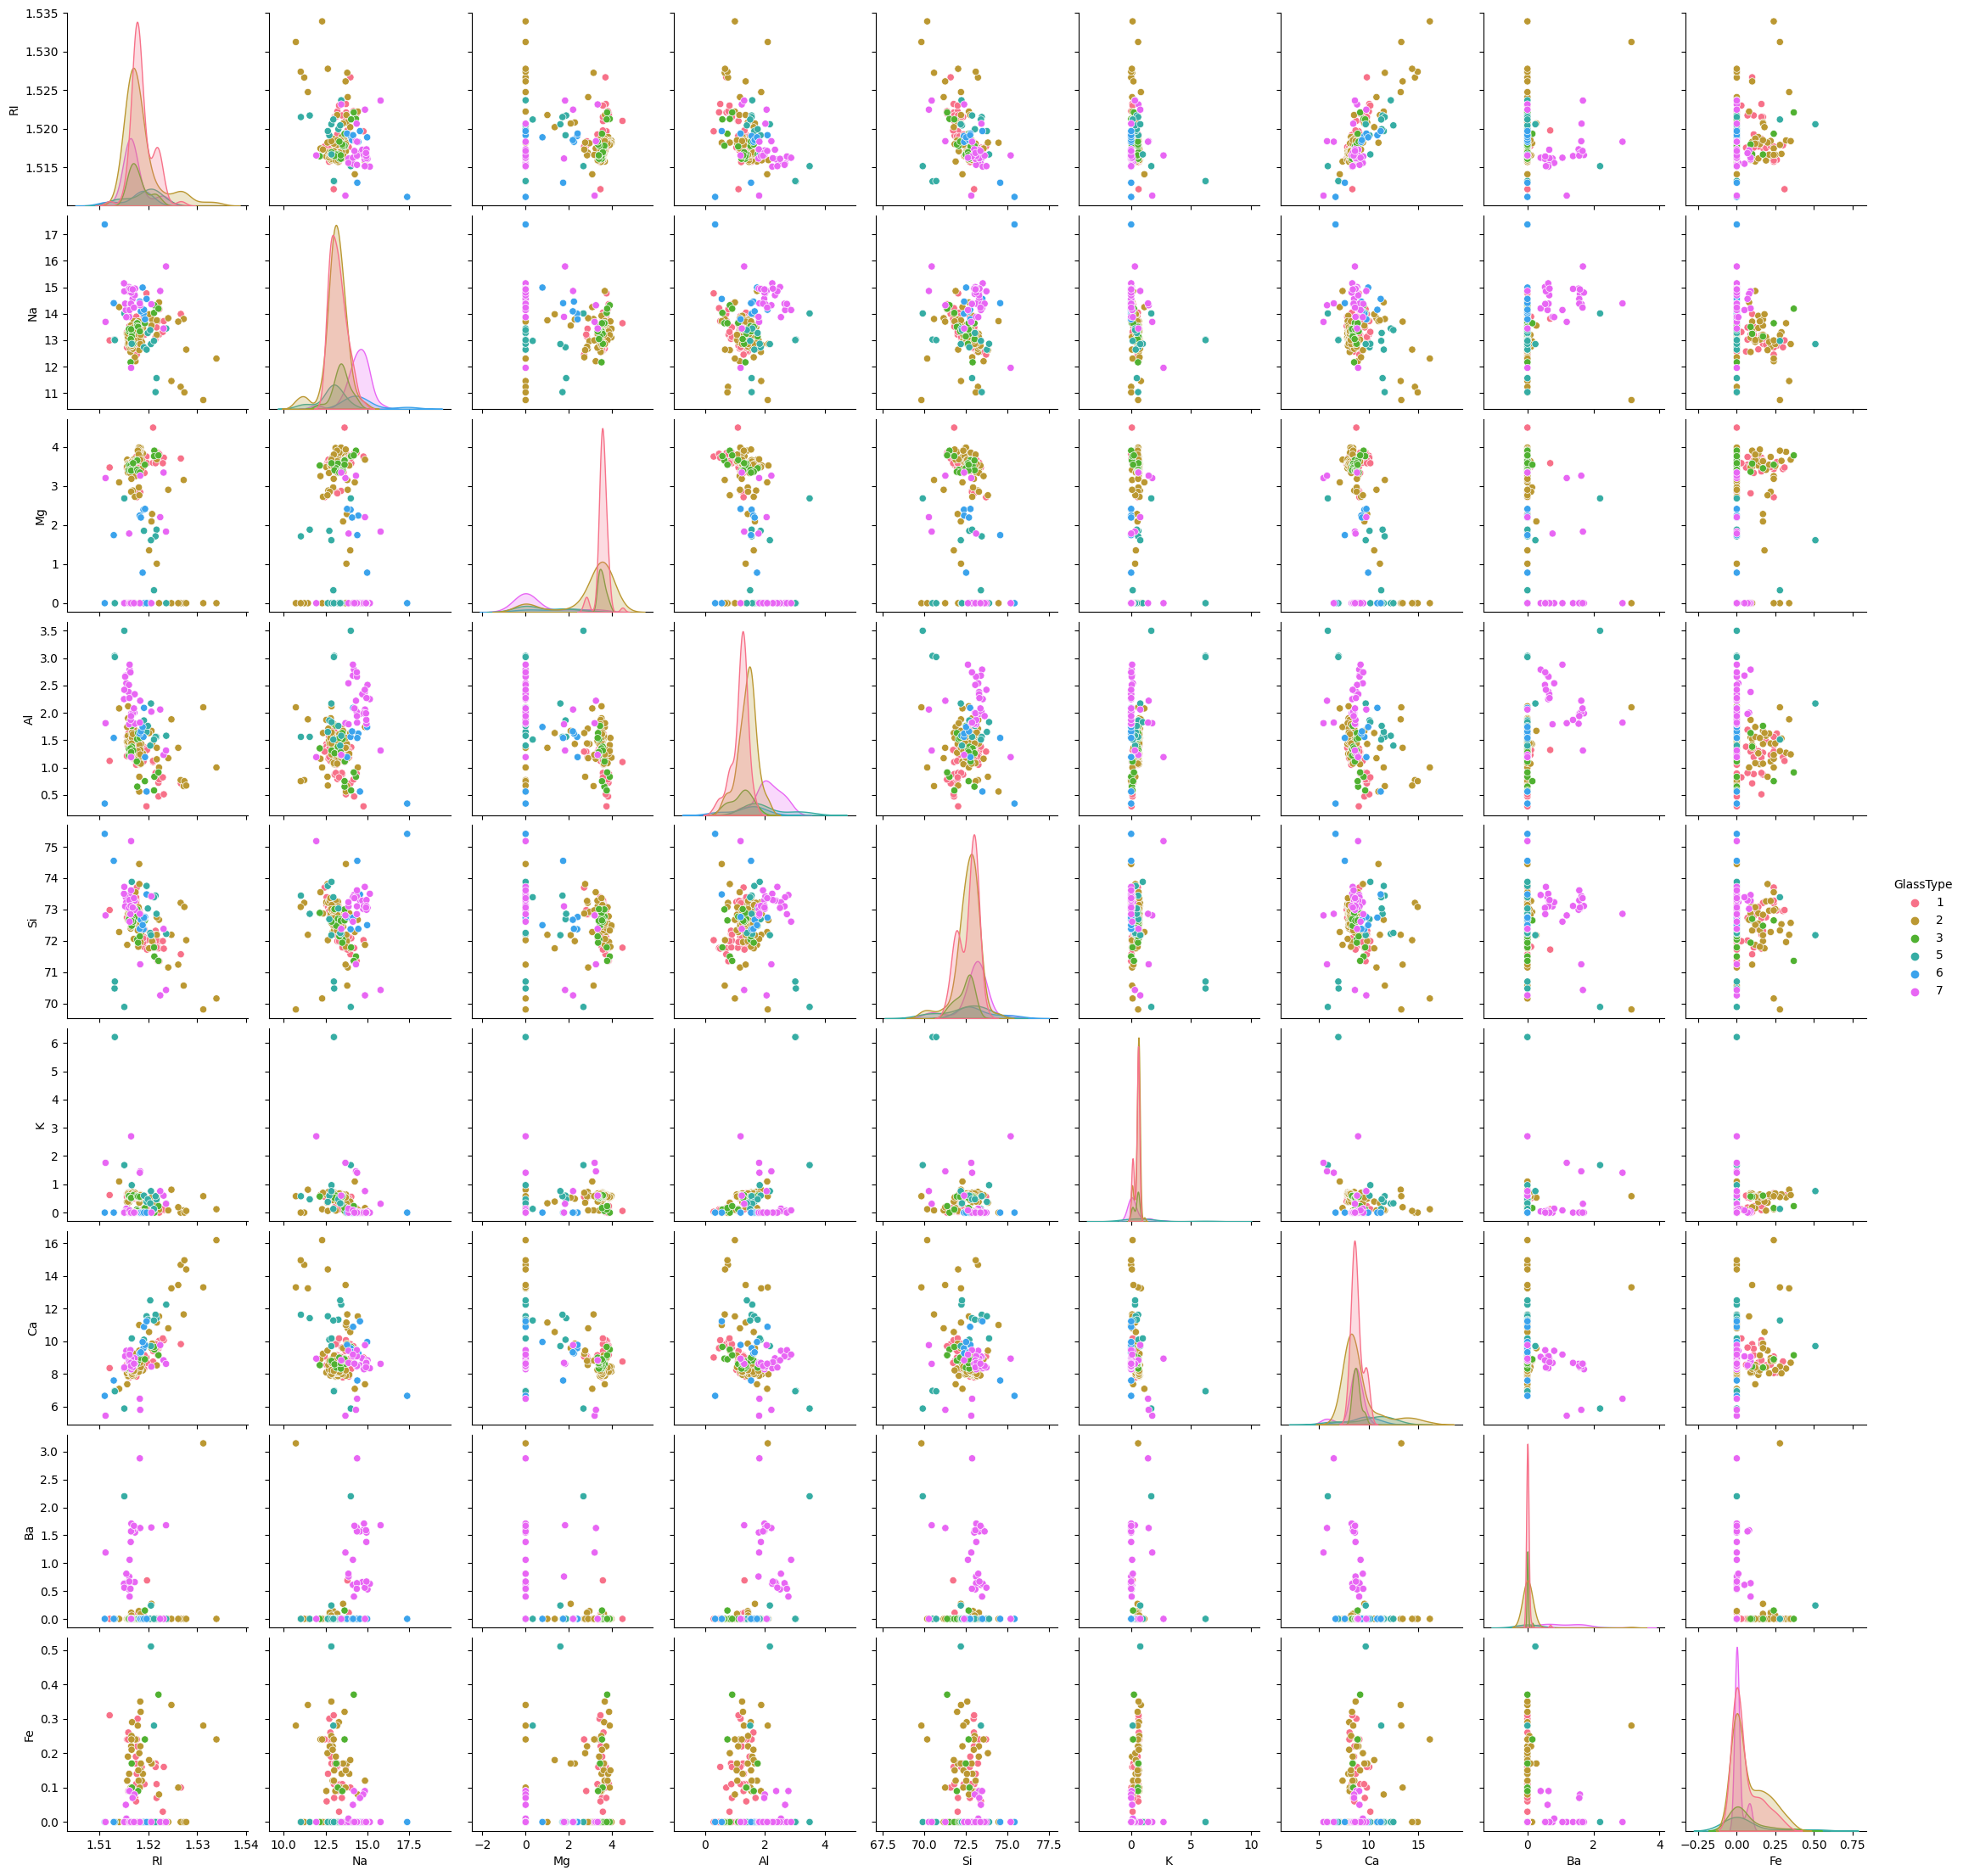

In [13]:
sns.pairplot(data=df, hue="GlassType", palette=sns.color_palette("husl", 6))
plt.show()

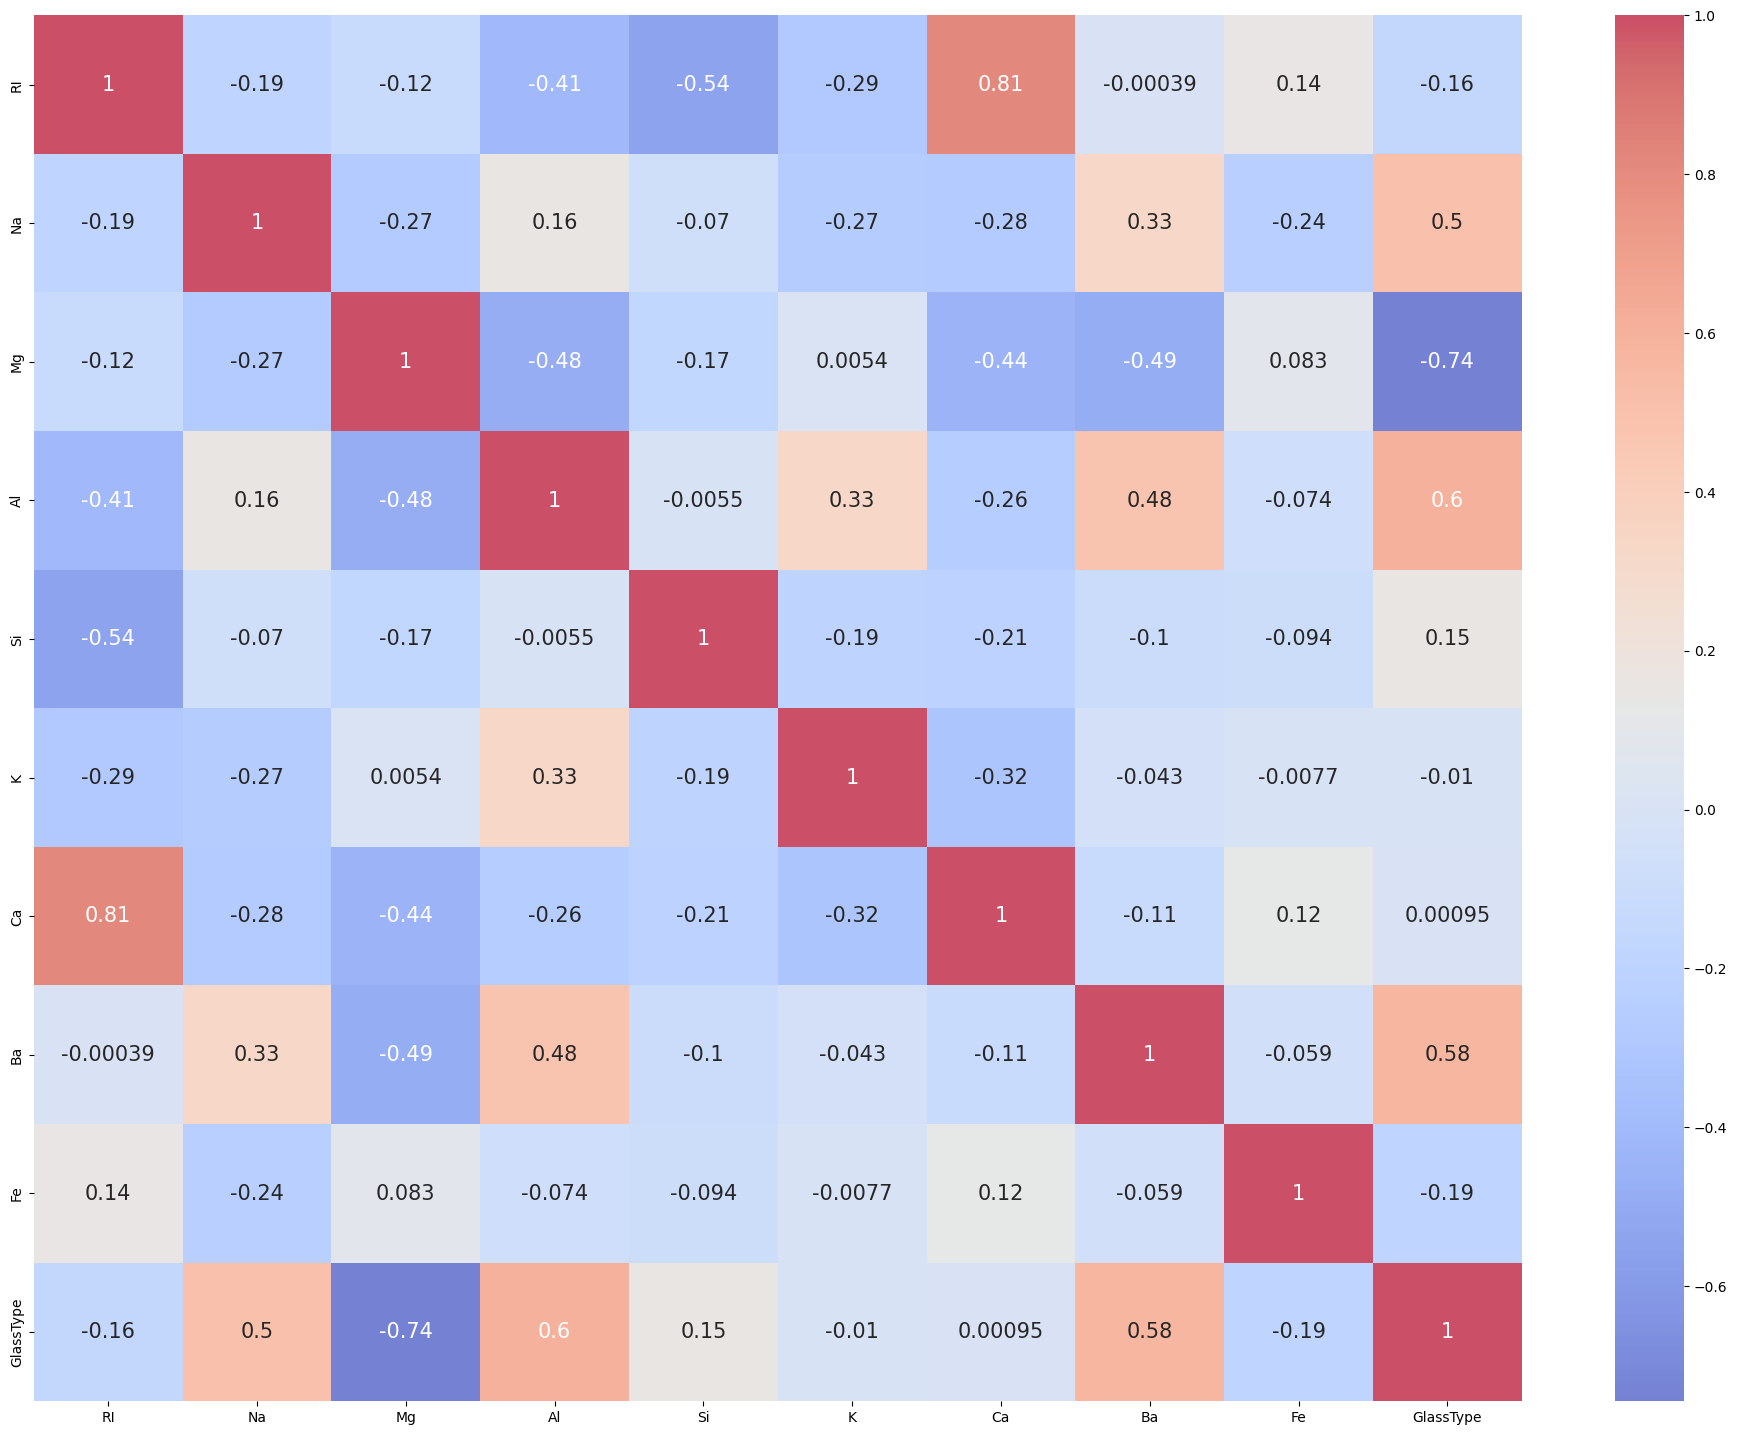

In [14]:
plt.figure(figsize=(24, 18))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15}, alpha=0.7, cmap= 'coolwarm')
plt.show()

## Zad 2 - przygotowanie danych (zrobione dodatkowe za 5 pkt)

In [15]:
NOT_PROCESSED_DATA_NAME = "NotProcessedData"
NORMALIZED_DATA_NAME = "NormalizedData"
STANDARDIZED_DATA_NAME = "StandardizedData"
PCA_DATA_NAME = "PCATransformData"
MISSING_DATA_NAME = "FilledMissingData"

In [16]:
def get_data(X, y, data_processor=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)
    if data_processor is not None:
        X_train = data_processor.fit_transform(X_train)
        X_test = data_processor.transform(X_test)
        
    return X_train, X_test, y_train, y_test

In [17]:
X = df.drop(['GlassType'], axis=1)
y = df['GlassType']

data = {
    NOT_PROCESSED_DATA_NAME: get_data(X, y),
    NORMALIZED_DATA_NAME: get_data(X, y, Normalizer()),
    STANDARDIZED_DATA_NAME: get_data(X, y, StandardScaler()),
    PCA_DATA_NAME: get_data(X, y, PCA(n_components=3))
}

In [18]:
# Bonusowe punkty - skasowanie danych i wypełnienie ich zawartością
df_copy = deepcopy(df)
for col in df_copy.iloc[:, :9].columns:
    indices = df_copy.sample(frac=0.05).index
    df_copy[col][indices] = None
    
df_copy.isnull().sum()

RI           11
Na           11
Mg           11
Al           11
Si           11
K            11
Ca           11
Ba           11
Fe           11
GlassType     0
dtype: int64

In [19]:
# Dane wypełnione za pomocą mediany
df_copy.fillna(df_copy.median(numeric_only=True).round(3), inplace=True)
df_copy.isnull().sum()

RI           0
Na           0
Mg           0
Al           0
Si           0
K            0
Ca           0
Ba           0
Fe           0
GlassType    0
dtype: int64

In [20]:
# Zapisanie wypełnionych danych
X = df_copy.drop(['GlassType'], axis=1)
y = df_copy['GlassType']

data[MISSING_DATA_NAME] = get_data(X, y)

## Zad 3 - przygotowanie klasyfikatorów (zrobione dodatkowe za 5 pkt)

In [21]:
DEFAULT_NAME = "Default"
VOL1_NAME = "Ver1"
VOL2_NAME = "Ver2"
VOL3_NAME = "Ver3"

In [22]:
models = {
    "NaiveBayes": {
        DEFAULT_NAME: GaussianNB(priors=None, var_smoothing=1e-9),
        VOL1_NAME: GaussianNB(priors=[0.4, 0.4, 0.05, 0.05, 0.05, 0.05], var_smoothing=1e-9),
        VOL2_NAME: GaussianNB(priors=None, var_smoothing=1e-6),
        VOL3_NAME: GaussianNB(priors=[0.4, 0.4, 0.05, 0.05, 0.05, 0.05], var_smoothing=1e-6)
    },
    "DecisionTree": {
        DEFAULT_NAME: DecisionTreeClassifier(criterion='gini', splitter='best', 
                                             max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=121),
        VOL1_NAME: DecisionTreeClassifier(criterion='entropy', splitter='random', 
                                             max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=121),
        VOL2_NAME: DecisionTreeClassifier(criterion='gini', splitter='best',
                                             max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=121),
        VOL3_NAME: DecisionTreeClassifier(criterion='entropy', splitter='random',  
                                             max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=121)
    },
    "RandomForest": {
        DEFAULT_NAME: RandomForestClassifier(n_estimators=100, criterion='gini', 
                                             max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=121),
        VOL1_NAME: RandomForestClassifier(n_estimators=200, criterion='log_loss', 
                                          max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=121),
        VOL2_NAME: RandomForestClassifier(n_estimators=100, criterion='gini', 
                                          max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=121),
        VOL3_NAME: RandomForestClassifier(n_estimators=200, criterion='log_loss', 
                                          max_depth=5, min_samples_split=5, min_samples_leaf=2, random_state=121)
    },
    "SVM": {
        DEFAULT_NAME: SVC(C=1.0, kernel='rbf', gamma='scale', random_state=121),
        VOL1_NAME: SVC(C=1.0, kernel='poly', degree=4, gamma='scale', random_state=121),
        VOL2_NAME: SVC(C=2.0, kernel='poly', degree=4, gamma='auto', random_state=121),
        VOL3_NAME: SVC(C=1.0, kernel='linear', gamma='scale', random_state=121)
    }
}

## Zad 4 - Ocena klasyfikacji
### Uwagi:
Dane są porównywane następująco:
- na osi X mamy nazwę modelu
- na osi Y mamy wersję modelu
- użyta metryka porównawcza to F1-score

Modele są porównywane następująco:
- użyte są dane standardyzowane
- na osi X mamy modele
- na osi Y mamy metryki porównawcze

Dodatkowo porównujemy działanie modeli dla danych treningowych i testowych. Porównanie przebiega następująco:
- użyte są dane standardyzowane
- na osi X mamy modele
- na osi Y mamy F1-score dla danych treningowych i testowych

Tworzymy też tzw. confusion matrix, ale tylko dla danych standaryzowanych i domyślnej wersji modelu

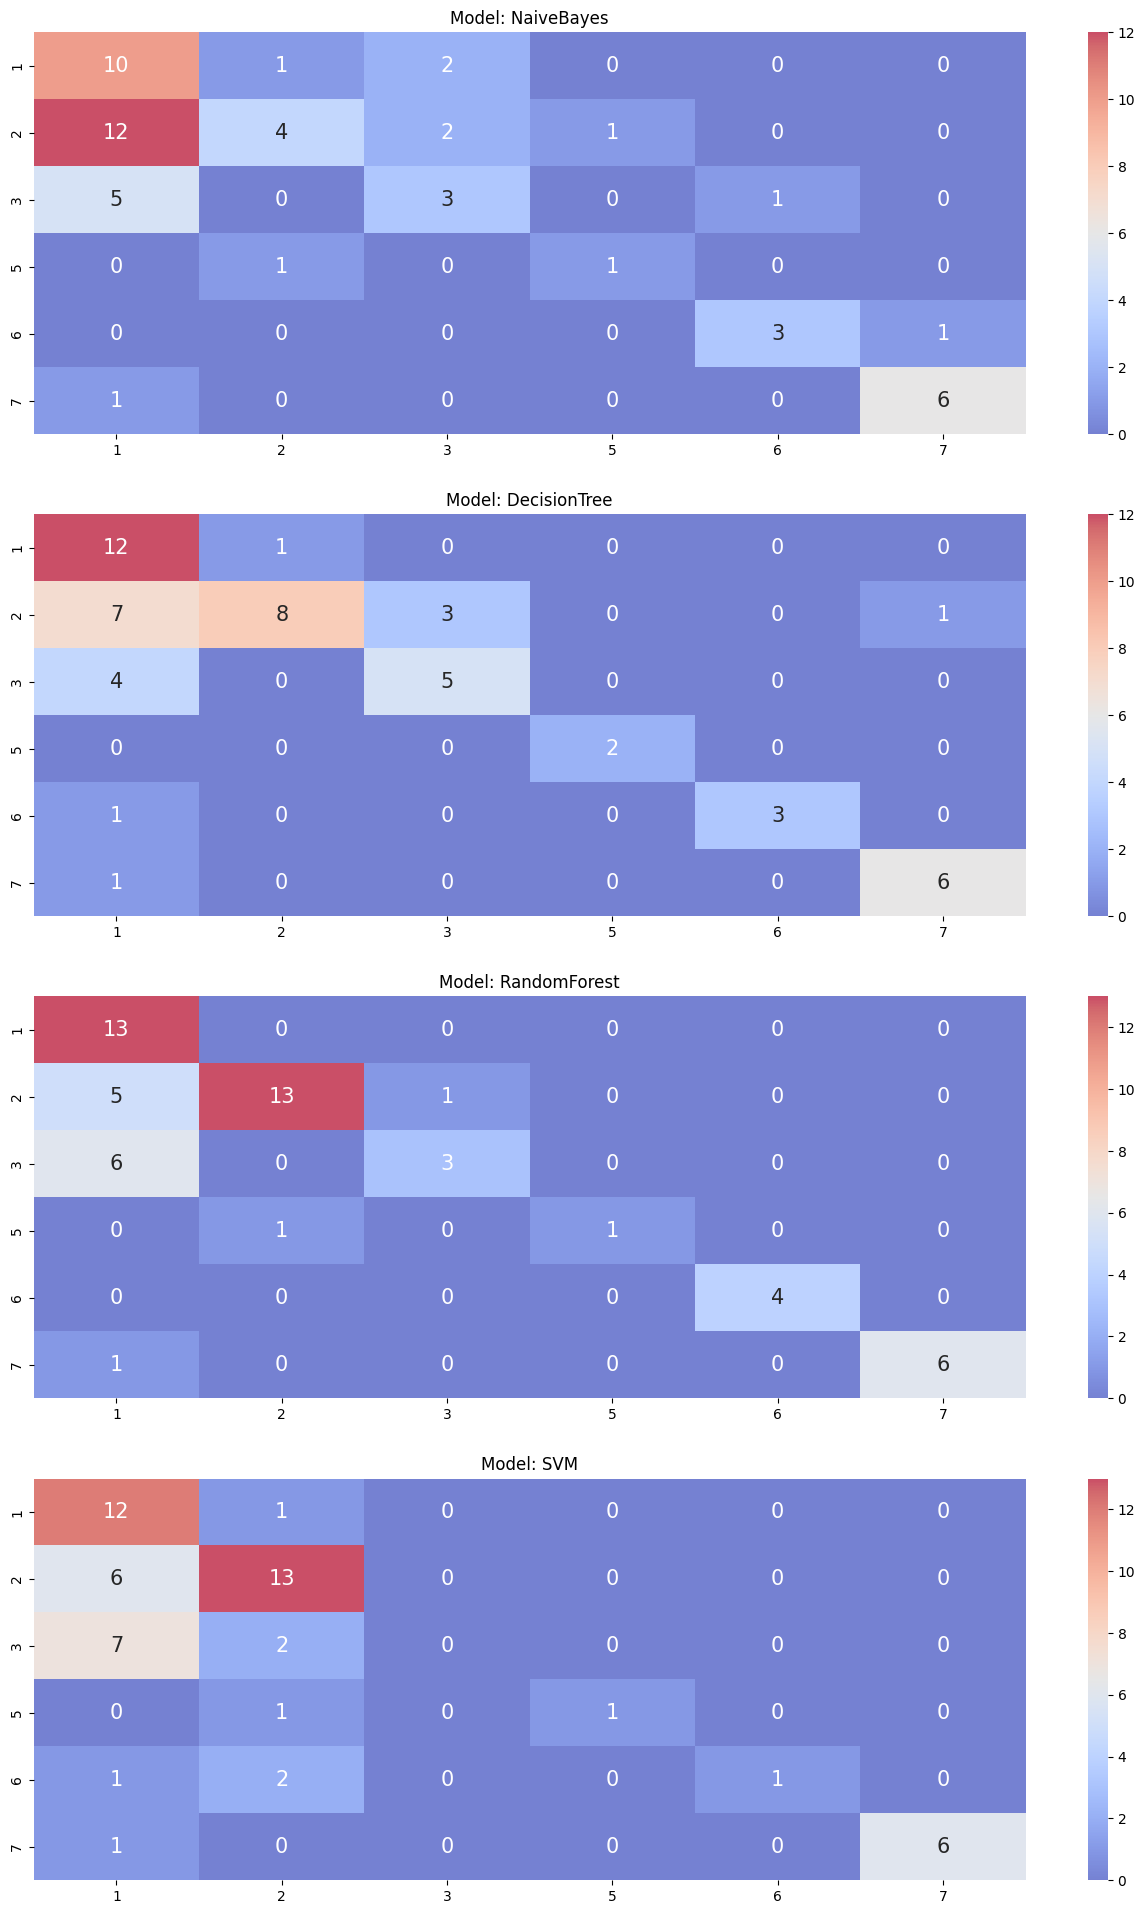

In [23]:
no_row = 0
labels = [1, 2, 3, 5, 6, 7]
fig, axs = plt.subplots(nrows=4, figsize=(16, 24))

data_transform_compar = {}
model_compar = {}
model_compar_train_test = {}

for data_name, orig_data in data.items():
    for model_name, model_data in models.items():
        for model_ver, orig_model in model_data.items():
            X_train, X_test, y_train, y_test = deepcopy(orig_data)
            model = deepcopy(orig_model)
            
            model.fit(X_train, y_train)
            y_train_pred = model.predict(X_train)
            y_pred = model.predict(X_test)
            
            accuracy = accuracy_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
            precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
            f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
            f1_train = f1_score(y_train, y_train_pred, average='macro', zero_division=0)
            
            if data_name == STANDARDIZED_DATA_NAME and model_ver == DEFAULT_NAME:
                sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, annot_kws={'size': 15}, 
                            alpha=0.7, cmap='coolwarm', xticklabels=labels, yticklabels=labels,
                            ax=axs[no_row]).set(title=f'Model: {model_name}')
                no_row += 1
            
            if model_ver == DEFAULT_NAME:
                if data_name in data_transform_compar:
                    data_transform_compar[data_name].append(f1)
                else:
                    data_transform_compar[data_name] = [f1]

            model_compar[model_name + " " + model_ver] = [accuracy, recall, precision, f1]
            model_compar_train_test[model_name + " " + model_ver] = [f1_train, f1]
            
plt.show()

In [24]:
data_transform_compar_df = pd.DataFrame(data_transform_compar).transpose()
data_transform_compar_df.columns = ["NaiveBayes", "DecisionTree", "RandomForest", "SVM"]
data_transform_compar_df

,NaiveBayes,DecisionTree,RandomForest,SVM
NotProcessedData,0.548325,0.750921,0.753895,0.083276
NormalizedData,0.507553,0.579623,0.701961,0.083276
StandardizedData,0.548325,0.750921,0.753895,0.545659
PCATransformData,0.228148,0.529808,0.442094,0.298568
FilledMissingData,0.444242,0.671892,0.753895,0.085043


In [25]:
model_compar_df = pd.DataFrame(model_compar).transpose()
model_compar_df.columns = ["Accuracy", "Recall", "Precision", "F1"]
model_compar_df

,Accuracy,Recall,Precision,F1
NaiveBayes Default,0.388889,0.510210,0.607655,0.444242
NaiveBayes Ver1,0.388889,0.510210,0.599802,0.437949
NaiveBayes Ver2,0.444444,0.558418,0.621673,0.532896
NaiveBayes Ver3,0.425926,0.539899,0.575258,0.507367
DecisionTree Default,0.648148,0.615824,0.813341,0.671892
DecisionTree Ver1,0.555556,0.580910,0.686688,0.578067
DecisionTree Ver2,0.481481,0.422354,0.480708,0.416667
DecisionTree Ver3,0.425926,0.414401,0.484575,0.428254
RandomForest Default,0.740741,0.729114,0.866429,0.753895
RandomForest Ver1,0.759259,0.737886,0.870833,0.762919


In [26]:
model_compar_train_test_df = pd.DataFrame(model_compar_train_test).transpose()
model_compar_train_test_df.columns = ["Train", "Test"]
model_compar_train_test_df

,Train,Test
NaiveBayes Default,0.355147,0.444242
NaiveBayes Ver1,0.348517,0.437949
NaiveBayes Ver2,0.405882,0.532896
NaiveBayes Ver3,0.393144,0.507367
DecisionTree Default,1.000000,0.671892
DecisionTree Ver1,1.000000,0.578067
DecisionTree Ver2,0.664960,0.416667
DecisionTree Ver3,0.610923,0.428254
RandomForest Default,1.000000,0.753895
RandomForest Ver1,1.000000,0.762919


### Koniec notebooka - wnioski zostały opisane w raporcie